In [16]:
import numpy as np

X_train = np.load('train_data.npy')
y_train = np.load('train_labels.npy')
#X_test = np.load("test_data.npy")
y_test = np.load('test_labels.npy')
#X_val = np.load('val_data.npy')
y_val = np.load('val_labels.npy')
print(y_val.shape)

(3194, 43)


In [ ]:
import numpy as np

X_train = np.load('train_data_augmented_500_per_class+train_data.npy')
y_train = np.load('train_labels_augmented_500_per_class+train_labels.npy')
X_val = np.load('val_data_augmented_500_per_class+train_data.npy')
y_val = np.load('val_labels_augmented_500_per_class+train_labels.npy')

In [ ]:
samples = []
for k in range(0,43):
    for i, img in enumerate(X_train):
        if int(np.argmax(y_train[i])) == k:
            samples.append(img)
            break

In [ ]:
import matplotlib.pyplot as plt



fig, axs = plt.subplots(nrows=4, ncols=11, figsize=(11, 4), constrained_layout=True)

axs = axs.ravel()

for i in range(0,43):
    axs[i].imshow(samples[i])
    axs[i].set_xticks([])
    axs[i].set_yticks([])

axs[43].remove()
#fig.tight_layout()
plt.savefig('Samples.png')
plt.show()

In [1]:
import numpy as np
y_aug_train = np.concatenate((np.load('train_labels_augmented_500_per_class.npy'), np.load('train_labels.npy')), axis=0)


# train + val distribution (augmented)
train_distribution = np.zeros((43,))

for label in (y_aug_train):
    train_distribution[int(np.argmax(label))] += 1


In [2]:
#original distribution
train_distribution_ = np.zeros((43,))
y_train_ = np.load('train_labels.npy')
#y_val_ = np.load('val_labels.npy')
for label in (y_train_):
    train_distribution_[int(np.argmax(label))] += 1

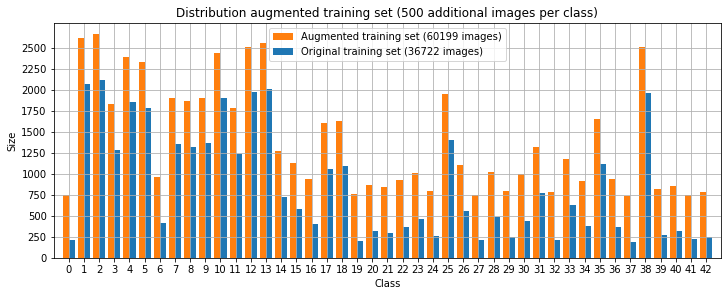

In [4]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(nrows=1, ncols=1, figsize=(10, 4), constrained_layout=True)

width = 0.4  # the width of the bars
axs.grid(True)
axs.bar(np.arange(0,43)-0.2,np.round(np.array(train_distribution),4), width, label='Augmented training set ('+str(int(y_aug_train.shape[0]))+' images)', color='tab:orange')
axs.bar(np.arange(0,43)+0.2,np.round(train_distribution_,4), width, label='Original training set ('+str(y_train_.shape[0])+' images)', color='tab:blue', alpha = 1)



#axs.bar(np.arange(0,43),np.round(train_distribution_), width, alpha=0.8, label='Original training data')

axs.set_xticks(np.arange(0,43))#, rotation='vertical')
axs.set_xlim(xmax=43,xmin=-1)
axs.set_xlim(xmax=43,xmin=-1)
axs.set_yticks(np.arange(0,2750,250))
axs.set_title('Distribution augmented training set (500 additional images per class)')
axs.set_xlabel('Class')
axs.set_ylabel('Size')



plt.legend()
plt.savefig('Train_distribution_augmented.png', dpi=500)
plt.show()

In [ ]:
# test distribution
test_distribution = np.zeros((43,))

for label in y_test:
    test_distribution[int(np.argmax(label))] += 1


In [ ]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(nrows=1, ncols=1, figsize=(10, 4), constrained_layout=True)

width = 0.8  # the width of the bars
axs.grid(True)
axs.bar(np.arange(0,43),np.round(test_distribution), width)

axs.set_xticks(np.arange(0,43))#, rotation='vertical')
axs.set_xlim(xmax=43,xmin=-1)
axs.set_yticks(np.arange(0,750,75))
axs.set_title('Distribution test set ('+str(y_test.shape[0])+' images)')
axs.set_xlabel('Class')
axs.set_ylabel('Size')

plt.savefig('Test_distribution.png')

In [ ]:
import matplotlib.pyplot as plt



fig, axs = plt.subplots(nrows=1, ncols=1, figsize=(10, 4), constrained_layout=True)

width = 0.4  # the width of the bars
axs.grid(True)

axs.bar(np.arange(0,43)-0.2,np.round(test_distribution,4), width, label='Test set ('+str(y_test.shape[0])+' images)', color='tab:orange')
axs.bar(np.arange(0,43)+0.2,np.round(train_distribution,4), width, label='Training set ('+str(y_train.shape[0])+' images)', color='tab:blue')

axs.set_xticks(np.arange(0,43))#, rotation='vertical')
axs.set_xlim(xmax=43,xmin=-1)
axs.set_yticks(np.arange(0,2500,250))
axs.set_title('Distribution test and training set')
axs.set_xlabel('Class')
axs.set_ylabel('Size')
axs.legend()
plt.savefig('test_vs_training_set.png', dpi=500)
plt.show()